In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset files:", path)

d:\XAI_Explainable_AI\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Admin\.cache\kagglehub\datasets\fedesoriano\heart-failure-prediction\versions\1


In [2]:
import pandas as pd

data = pd.read_csv('heart.csv')

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Data cleaning 

- No null vlaues present

In [4]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

- no any dupliacted values present in the dataset


In [5]:
data.duplicated().sum()

np.int64(0)

# Numeric and Categrical columns

In [6]:
# Numeric columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", numeric_cols.tolist())

Numeric columns: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [8]:
categorial_cols = data.select_dtypes(include=['object', 'category']).columns
print("Categorial columns:", categorial_cols.tolist())

Categorial columns: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


# Handling the Categrical columns

In [9]:
# unique values in categorial columns
for col in categorial_cols:
    print(f"Unique values in column '{col}': {data[col].unique()}")

Unique values in column 'Sex': ['M' 'F']
Unique values in column 'ChestPainType': ['ATA' 'NAP' 'ASY' 'TA']
Unique values in column 'RestingECG': ['Normal' 'ST' 'LVH']
Unique values in column 'ExerciseAngina': ['N' 'Y']
Unique values in column 'ST_Slope': ['Up' 'Flat' 'Down']


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorial_cols:
    data[col] = le.fit_transform(data[col])



In [11]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


# Data processing on the Numeric columns
- Heart Disease column to int only - target column

In [12]:
# converting data to float32
for col in data.columns:
    data[col] = data[col].astype('float32')

data['HeartDisease']=data['HeartDisease'].astype('int32')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    float32
 1   Sex             918 non-null    float32
 2   ChestPainType   918 non-null    float32
 3   RestingBP       918 non-null    float32
 4   Cholesterol     918 non-null    float32
 5   FastingBS       918 non-null    float32
 6   RestingECG      918 non-null    float32
 7   MaxHR           918 non-null    float32
 8   ExerciseAngina  918 non-null    float32
 9   Oldpeak         918 non-null    float32
 10  ST_Slope        918 non-null    float32
 11  HeartDisease    918 non-null    int32  
dtypes: float32(11), int32(1)
memory usage: 43.2 KB


# Data preparation for the train and test

In [13]:
from sklearn.model_selection import train_test_split
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (734, 11) (734,)
Test set shape: (184, 11) (184,)


In [14]:
# model for classification  - tree based model - i.e XGboost and RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8695652173913043


d:\XAI_Explainable_AI\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:10:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        77
           1       0.92      0.85      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

Confusion Matrix:
[[69  8]
 [16 91]]


In [16]:
import shap
explainer = shap.TreeExplainer(model=model,
                               data=X_train,
                               model_output="probability")

In [17]:
shap_values = explainer(X_test.iloc[[1],:])

shap_values

.values =
array([[-0.02847706,  0.02999724, -0.04316655,  0.02715755,  0.03310664,
        -0.01053721, -0.00854048, -0.0094437 , -0.04276091,  0.06647619,
         0.34811705]])

.base_values =
array([0.57038756])

.data =
array([[ 53.,   1.,   2., 145., 518.,   0.,   1., 130.,   0.,   0.,   1.]],
      dtype=float32)

In [18]:
shap_values.shape

(1, 11)

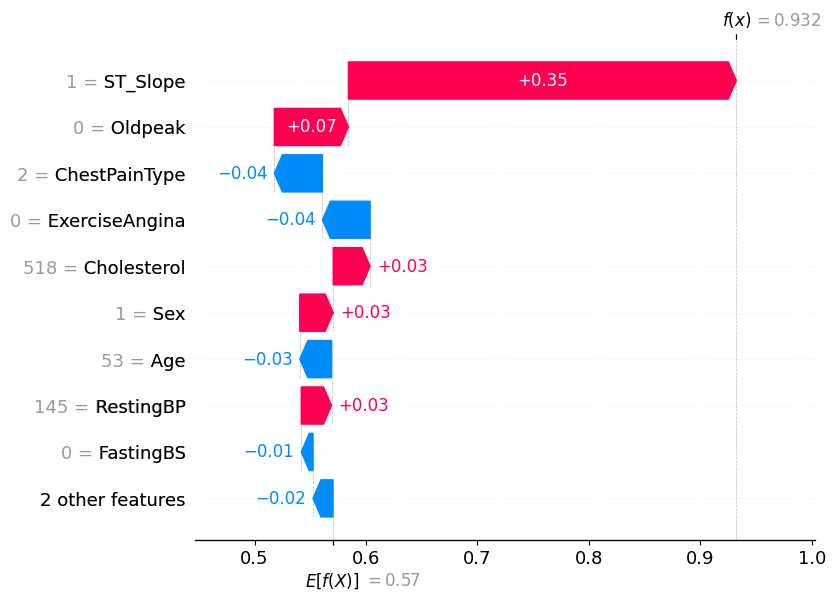

In [19]:
shap.plots.waterfall(shap_values[0])

# Apply the SHAP analysis on the small subset of test data 

In [21]:
X_train.shape

(734, 11)

In [22]:
X_test.shape

(184, 11)

In [24]:
# sample 500 rows from test data

test_data_sample = X_test.sample(100)

In [25]:
# calculate shap values for the entire test data

shap_values = explainer(test_data_sample)

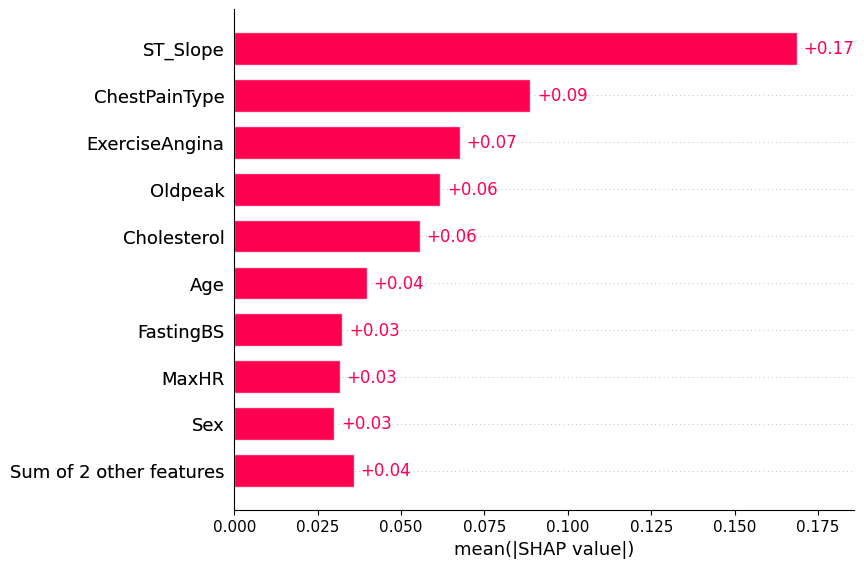

In [26]:
# bar plot

shap.plots.bar(shap_values)

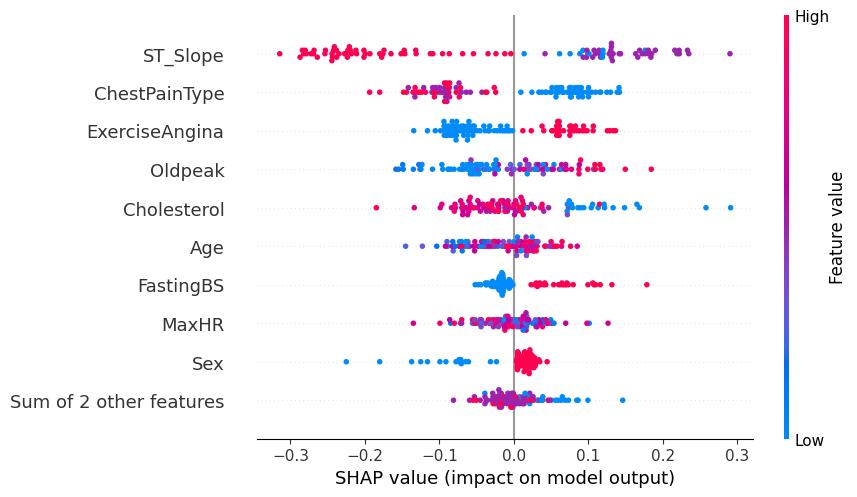

In [27]:
# summary plot

shap.plots.beeswarm(shap_values)

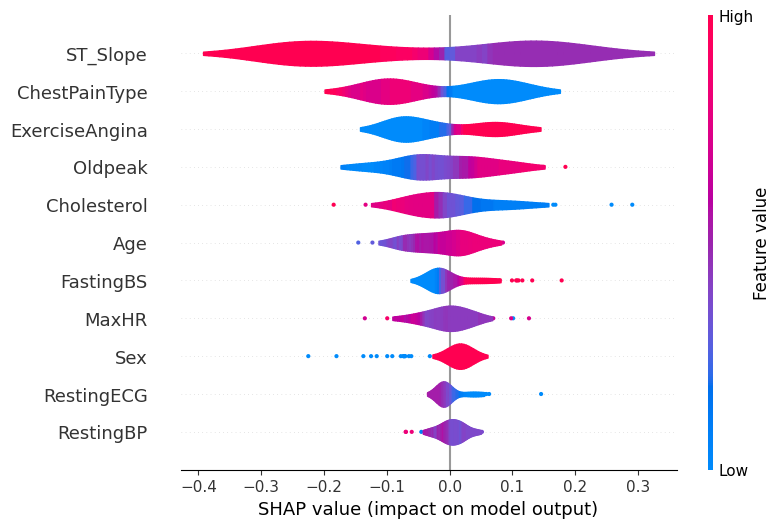

In [28]:
# violin plot

shap.plots.violin(shap_values)

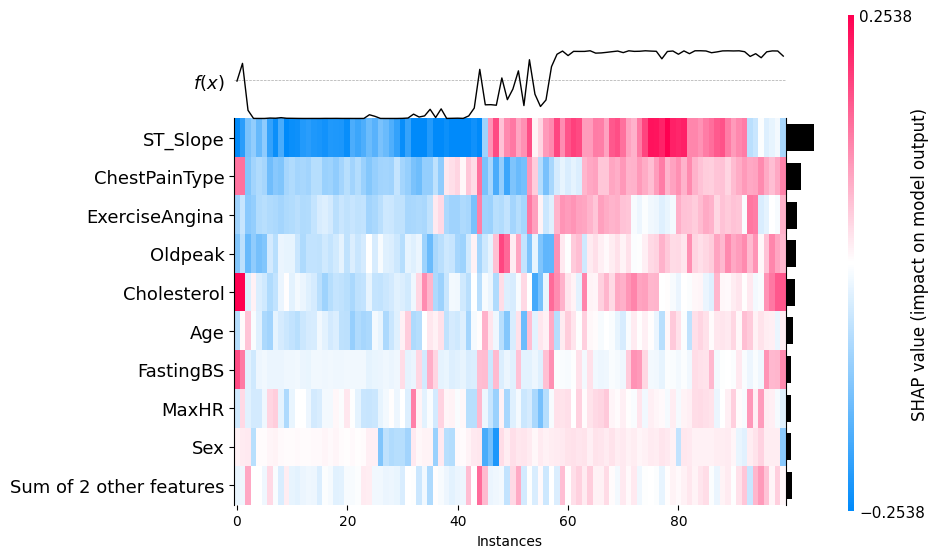

<Axes: xlabel='Instances'>

In [29]:
# heatmap plot

shap.plots.heatmap(shap_values)